In [1]:
import sys
sys.path.insert(0, '../icenumerics')
import icenumerics as ice
import numpy as np
import matplotlib.pyplot as plt
ureg = ice.ureg

from importlib import reload  
import shakti as sha
reload(sha)

from icenumerics.geometry import ordering 

%load_ext autoreload
%autoreload 2

# Building a Shakti lattice

In this script, I will write the functions in order to generate a shakti lattice. 

In [2]:
torad = np.pi/180

# <Parameters from the Cairo lattice>
a = 19.5458
l = 1.37*a

plaquette_cte = 2*l*np.sin(60*torad)
trap_sep = 10

plaquette_cte, (plaquette_cte-2*20)

(46.38041658417427, 6.38041658417427)

In [3]:
trap_sep = 10
part_d = 13*np.sqrt(2)
plaquette_cte = part_d*2+2*trap_sep

centers = [[0,0,0], # <First plaquette>
           [-plaquette_cte/4, plaquette_cte/2,0],
           [plaquette_cte/4, plaquette_cte/2,0],
           [-plaquette_cte/4, -plaquette_cte/2,0],
           [plaquette_cte/4, -plaquette_cte/2,0],

           [plaquette_cte, 0, 0], # <Second plaquette>
           [plaquette_cte/2,plaquette_cte/4, 0],
           [plaquette_cte/2,-plaquette_cte/4, 0],
           [(3/2)*plaquette_cte,plaquette_cte/4, 0],
           [(3/2)*plaquette_cte,-plaquette_cte/4, 0],

           [0,-plaquette_cte, 0], # <Third plaquette>
           [-plaquette_cte/2, -3/4*plaquette_cte,0],
           [-plaquette_cte/2, -5/4*plaquette_cte,0],
           [+plaquette_cte/2, -3/4*plaquette_cte,0],
           [+plaquette_cte/2, -5/4*plaquette_cte,0],
           
           [plaquette_cte, -plaquette_cte,0], # <Fourth plaquette>
           [3/4*plaquette_cte, -plaquette_cte/2,0],
           [5/4*plaquette_cte, -plaquette_cte/2,0],
           [3/4*plaquette_cte, -3/2*plaquette_cte,0],
           [5/4*plaquette_cte, -3/2*plaquette_cte,0],
          ]*ureg.um


directions = [[0,3*a,0], # <First plaquette>
              [1*a,0,0],
              [1*a,0,0],
              [1*a,0,0],
              [1*a,0,0],
              [3*a,0,0], # <Second plaquette>
              [0,1*a,0],
              [0,1*a,0],
              [0,1*a,0],
              [0,1*a,0],
              [3*a,0,0], #  <Third plaquette>
              [0,1*a,0],
              [0,1*a,0],
              [0,1*a,0],
              [0,1*a,0],
              [0,3*a,0], # <Fourth plaquette>
              [1*a,0,0],
              [1*a,0,0],
              [1*a,0,0],
              [1*a,0,0],
             ]*ureg.um

/home/carolina/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)


(-34.06173157302029, 90.83128419472077, -90.83128419472077, 34.06173157302029)

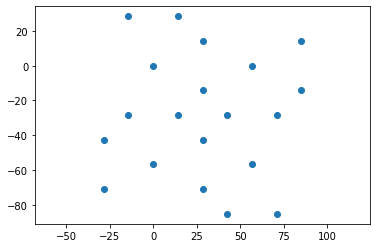

In [4]:
plt.plot(centers[:,0], centers[:,1],'o')
plt.axis('equal')

In [5]:
centers

array([[  0.        ,   0.        ,   0.        ],
       [-14.19238816,  28.38477631,   0.        ],
       [ 14.19238816,  28.38477631,   0.        ],
       [-14.19238816, -28.38477631,   0.        ],
       [ 14.19238816, -28.38477631,   0.        ],
       [ 56.76955262,   0.        ,   0.        ],
       [ 28.38477631,  14.19238816,   0.        ],
       [ 28.38477631, -14.19238816,   0.        ],
       [ 85.15432893,  14.19238816,   0.        ],
       [ 85.15432893, -14.19238816,   0.        ],
       [  0.        , -56.76955262,   0.        ],
       [-28.38477631, -42.57716447,   0.        ],
       [-28.38477631, -70.96194078,   0.        ],
       [ 28.38477631, -42.57716447,   0.        ],
       [ 28.38477631, -70.96194078,   0.        ],
       [ 56.76955262, -56.76955262,   0.        ],
       [ 42.57716447, -28.38477631,   0.        ],
       [ 70.96194078, -28.38477631,   0.        ],
       [ 42.57716447, -85.15432893,   0.        ],
       [ 70.96194078, -85.15432893,   0.        ]]) <Unit('micrometer')>

(-35.996765773020286,
 92.76631839472077,
 -92.76631839472077,
 35.996765773020286)

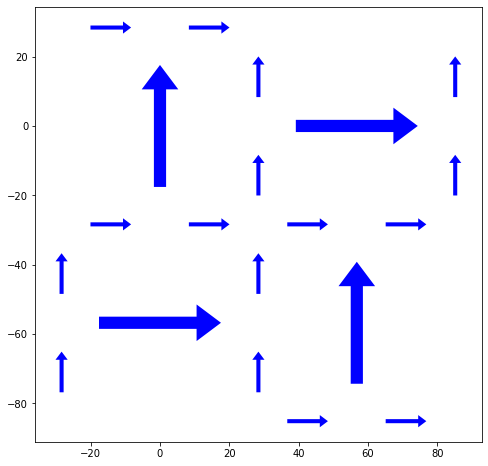

In [6]:
sp = ice.spins(centers = centers, directions = directions)

f, (ax1) = plt.subplots(1,1,figsize = (8,8))
sp.display(ax1)
plt.axis('equal')

## Generalizing 

To implement the shakti lattice we create a shakti.py file with the functions that allow to generate and build the lattice.

In [7]:
output = "/home/carolina/CairoLattice_ACI_PROJECT/Scripts/Output_Script-10.0"

In [8]:
sp = sha.spins()
ureg = ice.ureg
sp.create_lattice(geometry = "shakti",size =[5,5],lattice_constant=1*ureg.um , border="periodic")
sp.order_spins(ordering.random_ordering)

/home/carolina/CairoLattice_ACI_PROJECT/Scripts/shakti.py:170: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  new_centers[:,1] = centersY


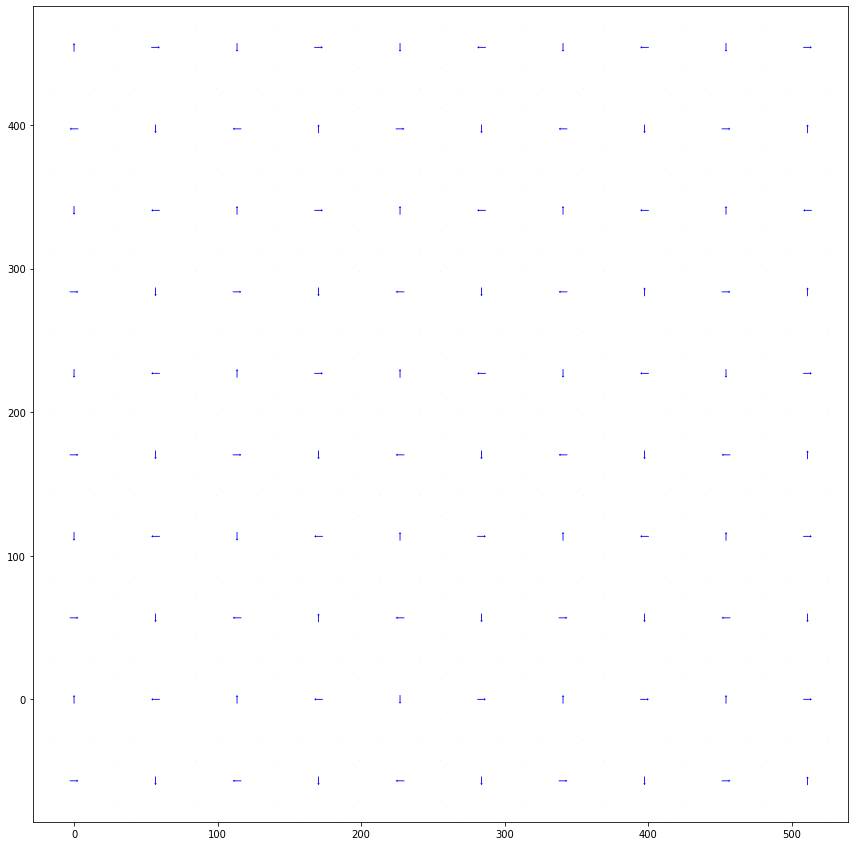

In [9]:
f, (ax1) = plt.subplots(1,1,figsize = (15,15))
sp.display(ax1)

In [10]:
particle = ice.particle(radius = 5*ureg.um,
             susceptibility = 0.005,
             diffusion = 0.125*ureg.um**2/ureg.s,
             temperature = 300*ureg.K,
             density = 1000*ureg.kg/ureg.m**3)

trap_short = ice.trap(trap_sep = 10*ureg.um,
               height = 30*ureg.pN*ureg.nm,
               stiffness = 0.1*ureg.fN/ureg.nm)

trap_long = ice.trap(trap_sep = (20+13*np.sqrt(2))*ureg.um,
               height = 30*ureg.pN*ureg.nm,
               stiffness = 0.1*ureg.fN/ureg.nm)

In [11]:
lattice_constant = 10
traps = []

for s in sp:
    
    if ( s.direction[0].magnitude >= lattice_constant or s.direction[0].magnitude <= -lattice_constant or 
        s.direction[1].magnitude >= lattice_constant or s.direction[1].magnitude <= -lattice_constant):
        
        traps.append(trap_long)
        
    else:
        
        traps.append(trap_short)
        

In [12]:
col = ice.colloidal_ice(sp, particle, traps, height_spread = 0, susceptibility_spread = 0.1)
col.pad_region(5*ureg.um)

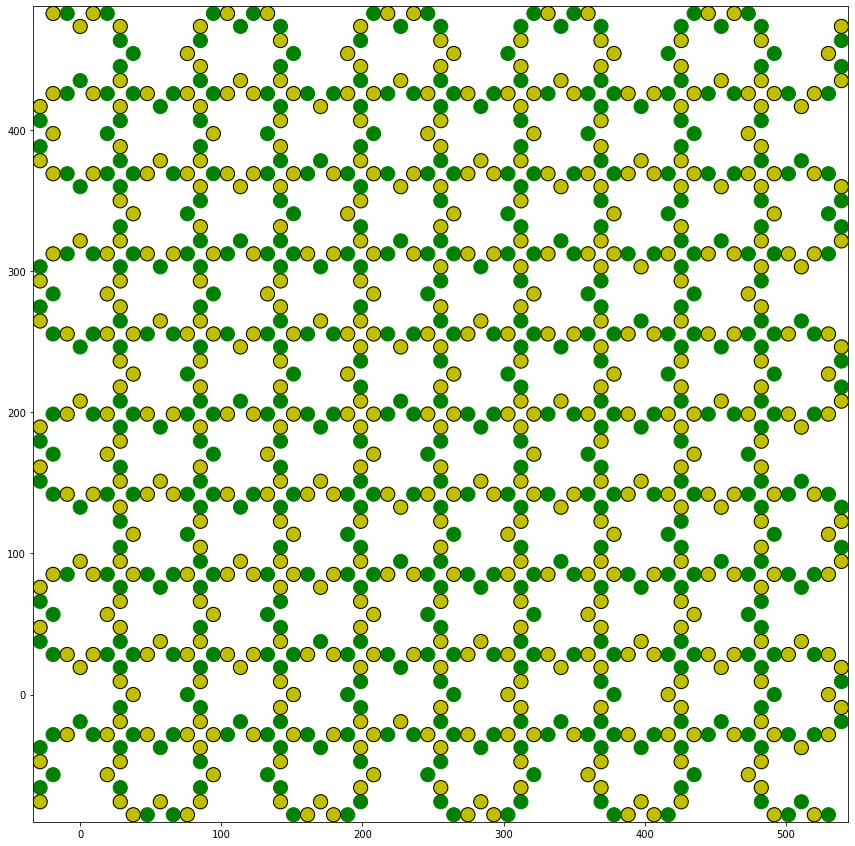

In [13]:
f, (ax1) = plt.subplots(1,1,figsize = (15,15))

col.display(ax1)

In [14]:
world = ice.world(
    field = 25*ureg.mT,
    temperature = 300*ureg.K,
    dipole_cutoff = 200*ureg.um)
#   boundaries = ["p", "p", "p"])

In [22]:

total_time = 500*ureg.s
col.simulate(world,
             name = "shakti_test",
             include_timestamp = False,
             targetdir = output,
             framerate = 1*ureg.Hz,
             timestep = 10*ureg.ms,
             run_time = total_time,
             output = ["x","y","z","mux","muy","muz"])

../icenumerics/icenumerics/magcolloids/magcolloids/geometry.py:13: RuntimeWarning: invalid value encountered in multiply
  c = np.empty([len(a),4])*np.NaN


scanning file


In [23]:
col.sim.field.fieldz = "v_Bmag*time/%f"%(total_time.to(ureg.us).magnitude)
col.run_simulation()

In [24]:
col.load_simulation(slice(0,None,10))

scanning file


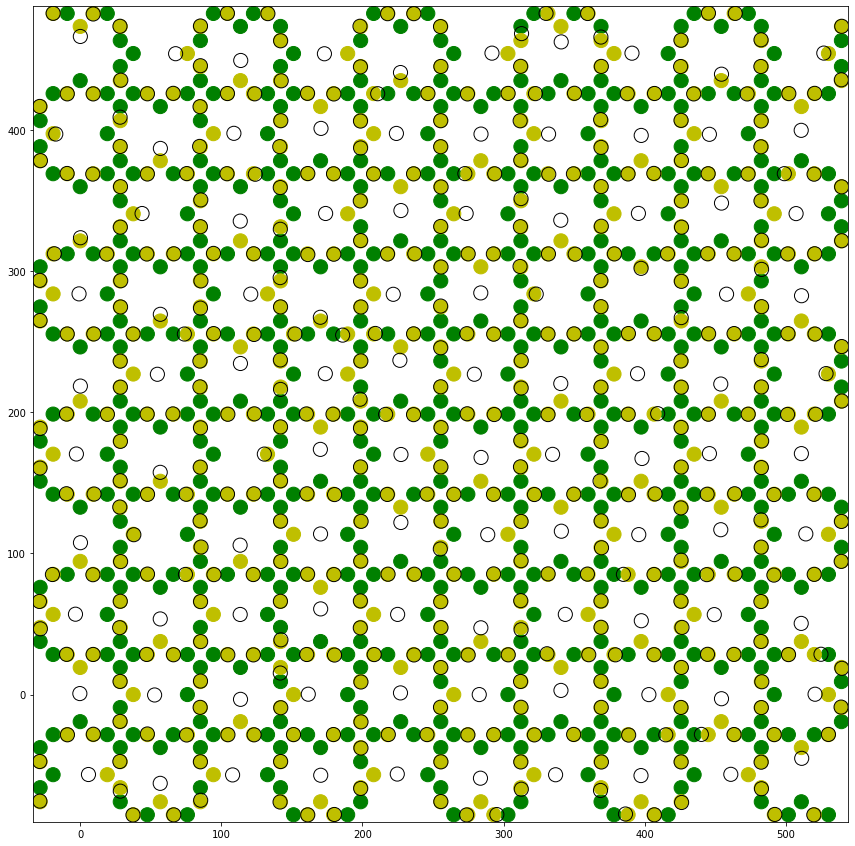

In [25]:
f, (ax1) = plt.subplots(1,1,figsize = (15,15))
v = ice.vertices()
col.set_state_from_frame(-1)

col.display(ax1)

[28.3848 31.7351 31.7351 ... 28.3848 28.3848 20.0711]


,x,y,coordination,dx,dy
charge,,,,,
-4,7,7,7,7,7
-2,73,73,73,73,73
0,37,37,37,37,37


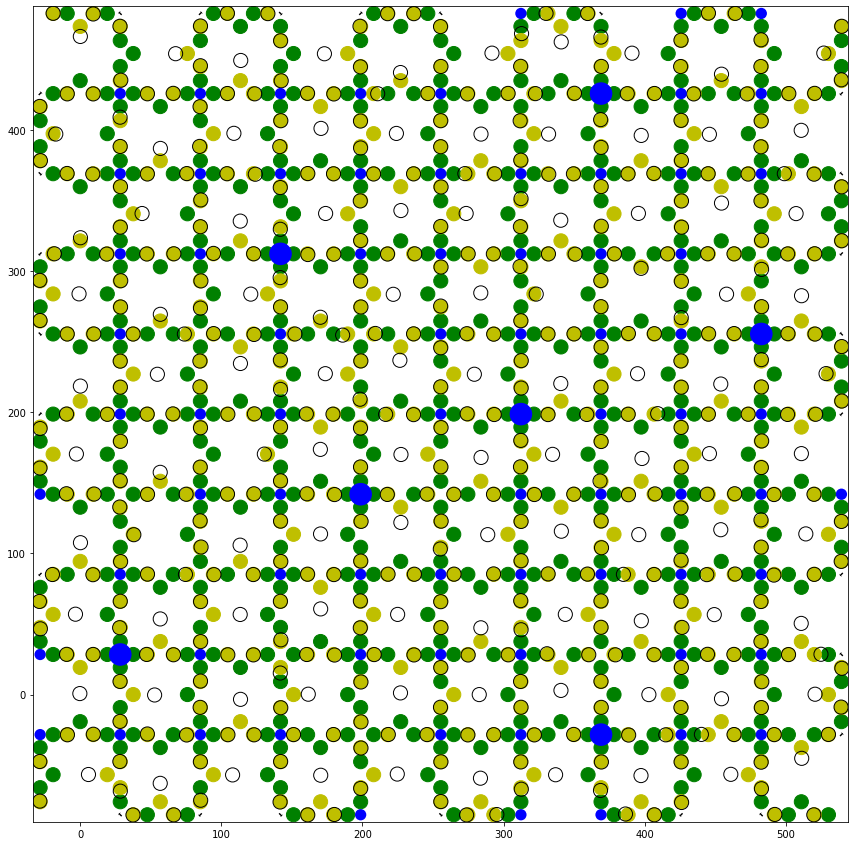

In [26]:
f, (ax1) = plt.subplots(1,1,figsize = (15,15))
v = ice.vertices()
col.set_state_from_frame(-1)
v = v.colloids_to_vertices(col)

col.display(ax1)
v.display(ax1)
v.vertices.groupby('charge').count()

In [27]:
v.vertices= v.vertices.query('coordination == 2')

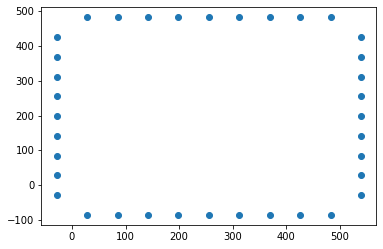

In [28]:
plt.plot(v.vertices.x, v.vertices.y, 'o')